<a href="https://colab.research.google.com/github/VishalIITP/MangoLeafDiseaseDetection/blob/main/mangoLeafDiseaseDetectino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Conv2D,UpSampling2D,MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array,load_img
from skimage.color import rgb2lab,lab2rgb

from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import tensorflow as tf
import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path = "/content/gdrive/MyDrive/Collab/mangoLeafDiseaseDetection/Dataset"

In [100]:
SIZE = 256
SEED_TRAINING = 121
SEED_TESTING = 197
SEED_VALIDATION = 164
CHANNELS = 3
n_classes = 8
EPOCHS = 50
BATCH_SIZE = 16
input_shape = (SIZE, SIZE, CHANNELS)

IMG_SHAPE  = 256

In [101]:
#image agumentation
from keras.preprocessing.image import ImageDataGenerator
image_gen_train = ImageDataGenerator(
      rescale=1./255,#rescaling
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      featurewise_center =True,#standardization
      featurewise_std_normalization = True,
      validation_split=0.2)

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=path,
                                                     shuffle=True,
                                                     color_mode = 'rgb',# color
                                                     class_mode='categorical',
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     subset='training')
train_data_valid = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=path,
                                                      shuffle=True,
                                                     color_mode = 'rgb',# color
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='categorical',
                                                     subset='validation')


Found 3200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [102]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


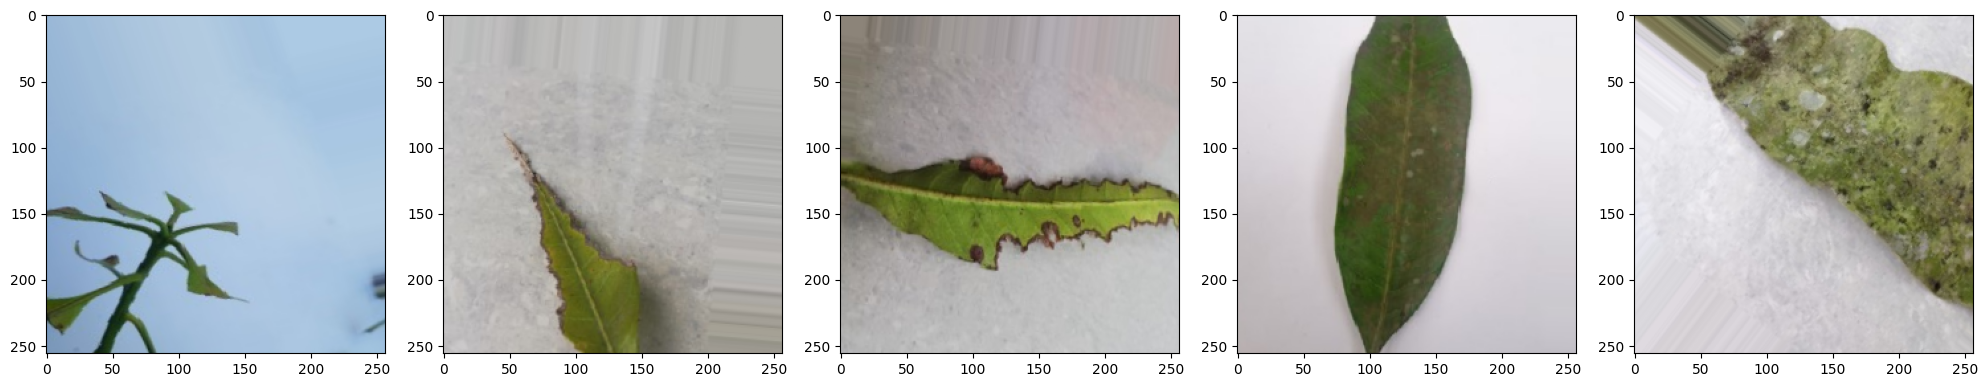

In [103]:
import matplotlib.pyplot as plt
augmented_images = [train_data_gen[0][0][i] for i in range(5)]
plotImages(augmented_images)

In [104]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [105]:
# from keras import Sequential
from keras import layers

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu',input_shape=(IMG_SHAPE,IMG_SHAPE,3)),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(8, activation='softmax')
])

In [143]:
metrics1=tf.keras.metrics.Precision(name='precision')
metrics3=tf.keras.metrics.Recall(name='Recall')
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy',metrics1,metrics3])

In [144]:
history = model.fit(train_data_gen,validation_data=train_data_valid,
                              steps_per_epoch = train_data_gen.samples // BATCH_SIZE,
                              validation_steps = train_data_valid.samples // BATCH_SIZE,
                              epochs=30)

Epoch 1/30
200/200 [==============================] - 88s 420ms/step - loss: 0.8817 - accuracy: 0.6825 - precision: 0.8539 - Recall: 0.5041 - val_loss: 0.8540 - val_accuracy: 0.6725 - val_precision: 0.8021 - val_Recall: 0.5675
Epoch 2/30
200/200 [==============================] - 78s 390ms/step - loss: 0.6169 - accuracy: 0.7713 - precision: 0.8331 - Recall: 0.6847 - val_loss: 1.0420 - val_accuracy: 0.6700 - val_precision: 0.7674 - val_Recall: 0.5775
Epoch 3/30
200/200 [==============================] - 77s 383ms/step - loss: 0.5415 - accuracy: 0.8097 - precision: 0.8442 - Recall: 0.7653 - val_loss: 1.0277 - val_accuracy: 0.6413 - val_precision: 0.7166 - val_Recall: 0.5500
Epoch 4/30
200/200 [==============================] - 77s 385ms/step - loss: 0.4839 - accuracy: 0.8241 - precision: 0.8494 - Recall: 0.7931 - val_loss: 0.9272 - val_accuracy: 0.7412 - val_precision: 0.7675 - val_Recall: 0.6850
Epoch 5/30
200/200 [==============================] - 78s 392ms/step - loss: 0.3873 - accura

KeyboardInterrupt: ignored

In [88]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_96 (Conv2D)          (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_96 (MaxPooli  (None, 32, 32, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_97 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_97 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_72 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_98 (Conv2D)          (None, 16, 16, 64)      

In [89]:
model.save('/content/gdrive/MyDrive/Collab/mangoLeafDiseaseDetection/TrainedModel/trModelNew.keras')

In [90]:
from keras import models
model2=models.load_model('/content/gdrive/MyDrive/Collab/mangoLeafDiseaseDetection/TrainedModel/trModelNew.keras')

In [91]:
model2.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_96 (Conv2D)          (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_96 (MaxPooli  (None, 32, 32, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_97 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_97 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_72 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_98 (Conv2D)          (None, 16, 16, 64)      

In [96]:
import random

image_path='/content/gdrive/MyDrive/Collab/mangoLeafDiseaseDetection/Dataset/'

random_folder=random.choice(os.listdir(image_path))
print(random_folder)

random_file=random.choice(os.listdir(image_path+random_folder))
print(random_file)


Gall Midge
IMG_20211106_161321 (Custom).jpg


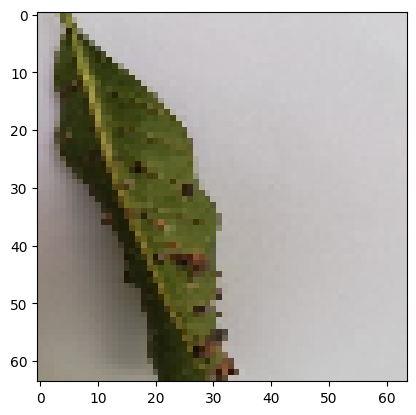

1/1 [==============================] - 0s 220ms/step


array([[4.6384514e-07, 4.4199484e-04, 5.0709083e-08, 5.5811945e-11,
        9.9832326e-01, 9.1228543e-07, 1.2324102e-03, 9.0816303e-07]],
      dtype=float32)

In [97]:
# from PIL import Image
# img = Image.open(path2) # image extension *.png,*.jpg
# img = img.resize((new_width, new_height), Image.ANTIALIAS)
from matplotlib import pyplot as plt

path2=image_path+random_folder+'/'+random_file
# path2="/content/gdrive/MyDrive/Collab/mangoLeafDiseaseDetection/TestImages/anthracnose.jpeg"

test = tf.keras.utils.load_img(path2,color_mode = 'rgb',target_size=(IMG_SHAPE,IMG_SHAPE))
input_arr = tf.keras.utils.img_to_array(test)
input_arr=input_arr/255

plt.imshow(input_arr, interpolation='nearest')
plt.show()

input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

predictions

In [108]:
ref=train_data_gen.class_indices
ref_list=list(ref.keys())
# print(ref_list)

for item in predictions:
  output_list=item.tolist()
max_element=max(output_list)
for i in range(len(output_list)):
  if max_element==output_list[i]:
    print(ref_list[i])



Gall Midge


In [ ]:
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
# define the model architecture


def create_model(learning_rate=0.001, dropout_rate=0.25):
    model = Sequential([
        layers.Rescaling(1./255),
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),

        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(dropout_rate),

        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(dropout_rate),

        layers.Conv2D(128, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(dropout_rate),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(8, activation='softmax')
    ])
    optimizer = Adam(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# set the hyperparameters
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'dropout_rate': [0.1, 0.25, 0.5]
}
batch_size = 32
epochs = 10

# create the KerasClassifier for GridSearchCV
model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)

# create early stopping callback
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# perform GridSearchCV to tune hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(train_generator, validation_data=validation_generator, callbacks=[early_stopping])

# print the best hyperparameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the directories and parameters
data_dir = "/content/gdrive/My Drive/data mining/archive"
img_size = (240, 320)

# Load the data
labels = os.listdir(os.path.join(data_dir))
X_train, y_train = [], []
X_val, y_val = [], []
X_test, y_test = [], []
for label in labels:
    for img_name in os.listdir(os.path.join(data_dir, label)):
        img_path = os.path.join(data_dir, label, img_name)
        img = load_img(img_path, target_size=img_size)
        X_train.append(img_to_array(img))
        y_train.append(label)
    for img_name in os.listdir(os.path.join(data_dir, label)):
        img_path = os.path.join(data_dir, 'val', label, img_name)
        img = load_img(img_path, target_size=img_size)
        X_val.append(img_to_array(img))
        y_val.append(label)
    for img_name in os.listdir(os.path.join(data_dir, label)):
        img_path = os.path.join(data_dir, 'test', label, img_name)
        img = load_img(img_path, target_size=img_size)
        X_test.append(img_to_array(img))
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_val = X_val.reshape(X_val.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# Encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Train and evaluate the Naive Bayes model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_acc = nb.score(X_test, y_test)
print("Naive Bayes accuracy:", nb_acc)

# Train and evaluate the K-Nearest Neighbors model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_acc = knn.score(X_test, y_test)
print("K-Nearest Neighbors accuracy:", knn_acc)

# Train and evaluate the Support Vector Machine model
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X_train, y_train)
svm_acc = svm.score(X_test, y_test)
print("Support Vector Machine accuracy:", svm_acc)

# Train and evaluate the Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
rf_acc = rf.score(X_test, y_test)
print("Random Forest accuracy:", rf_acc)

# Train and evaluate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr_acc = lr.score(X_test, y_test)
print("Logistic Regression accuracy:", lr_acc)

# Train and evaluate the Decision Tree model
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
dt_acc = dt.score(X_test, y_test)
print("Decision Tree accuracy:", dt_acc)

# Add the accuracy scores for logistic regression and decision tree to the accuracies dictionary
accuracies['Logistic Regression'] = lr_acc
accuracies['Decision Tree'] = dt_acc


# Create a dictionary to store the accuracies of all models
accuracies = {'Logistic Regression': lr_acc, 'Decision Tree': dt_acc, 'Naive Bayes': nb_acc, 'K-Nearest Neighbors': knn_acc, 'Support Vector Machine': svm_acc, 'Random Forest': rf_acc}

# Print the accuracies of all models
print("Model Accuracies:")
for model, acc in accuracies.items():
    print(model + ":", acc)

In [ ]:
path='/content/gdrive/MyDrive/Collab/mangoLeafDiseaseDetection/Dataset/Anthracnose/20211008_124249 (Custom).jpg'
test =tf.keras.utils.load_img(path)

test_out=model.predict(test)

In [ ]:
!pip install --upgrade keras scikit-learn


In [ ]:
!pip install scikeras

In [ ]:
 # from keras.callbacks import EarlyStopping
# # from keras.wrappers.scikit_learn import KerasClassifier
# from scikeras.wrappers import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# import tensorflow as tf
# from keras.optimizers import Adam
# # define the model architecture


# def create_model(learning_rate=0.001, dropout_rate=0.25):
#     model = Sequential([
#         layers.Rescaling(1./255),
#         layers.Conv2D(16, 3, padding='same', activation='relu'),
#         layers.MaxPooling2D(),

#         layers.Conv2D(32, 3, padding='same', activation='relu'),
#         layers.MaxPooling2D(),
#         layers.Dropout(dropout_rate),

#         layers.Conv2D(64, 3, padding='same', activation='relu'),
#         layers.MaxPooling2D(),
#         layers.Dropout(dropout_rate),

#         layers.Conv2D(128, 3, padding='same', activation='relu'),
#         layers.MaxPooling2D(),
#         layers.Dropout(dropout_rate),

#         layers.Flatten(),
#         layers.Dense(256, activation='relu'),
#         layers.Dense(8, activation='softmax')
#     ])
#     optimizer = Adam(lr=learning_rate)
#     model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#     return model

# # set the hyperparameters
# param_grid = {
#     'learning_rate': [0.1, 0.01, 0.001],
#     'dropout_rate': [0.1, 0.25, 0.5]
# }
# batch_size = 32
# epochs = 10

# # create the KerasClassifier for GridSearchCV
# model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size, verbose=0)

# # create early stopping callback
# early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# # perform GridSearchCV to tune hyperparameters
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
# grid_result = grid.fit(train_generator, validation_generator, callbacks=[early_stopping])

# # print the best hyperparameters
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import load_img, img_to_array

# Define the directories and parameters
data_dir = "/content/gdrive/MyDrive/Collab/mangoLeafDiseaseDetection/Dataset"
img_size = (240, 320)

# Load the data
labels = os.listdir(os.path.join(data_dir))
X_train, y_train = [], []
X_val, y_val = [], []
X_test, y_test = [], []
for label in labels:
    for img_name in os.listdir(os.path.join(data_dir, label)):
        img_path = os.path.join(data_dir, label, img_name)
        img = load_img(img_path, target_size=img_size)
        X_train.append(img_to_array(img))
        y_train.append(label)
    for img_name in os.listdir(os.path.join(data_dir, label)):
        img_path = os.path.join(data_dir, 'val', label, img_name)
        img = load_img(img_path, target_size=img_size)
        X_val.append(img_to_array(img))
        y_val.append(label)
    for img_name in os.listdir(os.path.join(data_dir, label)):
        img_path = os.path.join(data_dir, 'test', label, img_name)
        img = load_img(img_path, target_size=img_size)
        X_test.append(img_to_array(img))
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_val = X_val.reshape(X_val.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# Encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

# Train and evaluate the Naive Bayes model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_acc = nb.score(X_test, y_test)
print("Naive Bayes accuracy:", nb_acc)

# Train and evaluate the K-Nearest Neighbors model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_acc = knn.score(X_test, y_test)
print("K-Nearest Neighbors accuracy:", knn_acc)

# Train and evaluate the Support Vector Machine model
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X_train, y_train)
svm_acc = svm.score(X_test, y_test)
print("Support Vector Machine accuracy:", svm_acc)

# Train and evaluate the Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
rf_acc = rf.score(X_test, y_test)
print("Random Forest accuracy:", rf_acc)

# Train and evaluate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr_acc = lr.score(X_test, y_test)
print("Logistic Regression accuracy:", lr_acc)

# Train and evaluate the Decision Tree model
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
dt_acc = dt.score(X_test, y_test)
print("Decision Tree accuracy:", dt_acc)

# Add the accuracy scores for logistic regression and decision tree to the accuracies dictionary
accuracies['Logistic Regression'] = lr_acc
accuracies['Decision Tree'] = dt_acc


# Create a dictionary to store the accuracies of all models
accuracies = {'Logistic Regression': lr_acc, 'Decision Tree': dt_acc, 'Naive Bayes': nb_acc, 'K-Nearest Neighbors': knn_acc, 'Support Vector Machine': svm_acc, 'Random Forest': rf_acc}

# Print the accuracies of all models
print("Model Accuracies:")
for model, acc in accuracies.items():
    print(model + ":", acc)